In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(0)

# Loading the Dataset

In [9]:
diabetesDF = pd.DataFrame(pd.read_csv('Weights/diabetes2.csv'))

In [10]:
print(diabetesDF.shape)
diabetesDF.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing the Dataset

## Getting basic information about the dataset

In [11]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dividing the dataset in Train, Validation and Test sets

In [13]:
trainData, validationData, testData = np.split(diabetesDF.sample(frac=1).reset_index(drop=True), [int(.7*len(diabetesDF)), int(.9*len(diabetesDF))])

In [14]:
trainData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,199,76,43,0,42.9,1.394,22,1
1,2,107,74,30,100,33.6,0.404,23,0
2,4,76,62,0,0,34.0,0.391,25,0
3,5,166,72,19,175,25.8,0.587,51,1
4,0,111,65,0,0,24.6,0.660,31,0


In [15]:
print(trainData.shape, validationData.shape, testData.shape)

(537, 9) (154, 9) (77, 9)


In [16]:
trainData = trainData.values.astype(np.float128)
validationData = validationData.values.astype(np.float128)
testData = testData.values.astype(np.float128)

In [93]:
X_train = trainData[:, :8]
y_train = trainData[:,8]
X_validation = validationData[:, :8]
y_validation = validationData[:,8]
X_test = testData[:, :8]
y_test = testData[:,8]

In [94]:
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (154, 8) (154,) (77, 8) (77,)


## Normalize the data(each feature should have mean 0 and standard deviation 1)

In [95]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

In [96]:
X_train = (X_train - X_mean)/X_std
X_validation = (X_validation - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [97]:
# adding a column of 1's in the start of the training and test datas to denote X0
trainOnes = np.ones((trainData.shape[0], 1))
validationOnes = np.ones((validationData.shape[0], 1))
testOnes = np.ones((testData.shape[0], 1))
print(trainOnes.shape, validationOnes.shape, testOnes.shape)
X_train = np.hstack((trainOnes, X_train))
X_validation = np.hstack((validationOnes, X_validation))
X_test = np.hstack((testOnes, X_test))
print(X_train.shape, X_validation.shape ,X_test.shape)


(537, 1) (154, 1) (77, 1)
(537, 9) (154, 9) (77, 9)


In [98]:
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 1.00000000e+00  6.86459476e-21  9.69119260e-20  7.26839445e-20
  4.11875686e-20 -2.90735778e-20  7.26839445e-20 -3.39191741e-20
 -2.26127827e-20]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]


# Logistic Regression

## Necessary Functions

In [99]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    :param z: Dot product of input vector and theta
    :return: sigmoid of z
    '''
    return 1.0/(1.0 + np.exp(-z))

In [100]:
def hypothesis(X, theta):
    '''
    Compute the hypothesis 
    :param X: Input vector
    :param theta: Theta parameters
    :return: hypothesis
    '''
    return sigmoid(np.dot(X, theta))

In [101]:
def error(X, y, theta):
    '''
    Compute the error
    :param X: Input vector
    :param y: Desired output vector
    :param theta: Theta parameters
    :return: error
    '''
    hypo = hypothesis(X, theta)
    return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))

In [102]:
def gradient(X, y, theta):
    '''
    Compute the gradient
    :param X: Input vector
    :param y: Desired output vector
    :param theta: Theta parameters
    :return: gradient
    '''
    m = X.shape[0]
    hypo = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hypo)) 
    return grad/m   

## Logistic Regression with Batch Gradient Descent(BGD)

In [103]:
def batchGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    '''
    perform batch gradient descent
    :param X_train: Training input vector
    :param y_train: Training output vector
    :param X_validation: Validation input vector
    :param y_validation: Validation output vector
    :param learningRate: Learning rate
    :param maxEpochs: Maximum number of epochs
    :return: theta parameters, list containing train errors and list containing validation errors
    '''
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        grad = gradient(X_train, y_train, theta)
        theta = theta - learningRate * grad
    return theta, trainErrorList, validationErrorList


In [104]:
mainTheta, trainErrorList, validationErrorList = batchGradientDescent(X_train, y_train, X_validation, y_validation, 0.01, 1500)

100%|██████████| 1500/1500 [00:00<00:00, 1616.51it/s]


In [105]:
mainTheta

array([-0.71124696,  0.35264956,  0.97786633, -0.25882582, -0.04508107,
        0.01052433,  0.55335412,  0.28796623,  0.22672725], dtype=float128)

## Loss Plots

In [106]:
plt.style.use('seaborn')
plt.style.use('ggplot')
plt.style.use('dark_background')

In [107]:
def drawBGDPlots(learningRate=0.01, maxEpochs=1000):
    '''
    Draw the BGD plots
    :param learningRate: Learning rate
    :param maxEpochs: Maximum number of epochs
    :return: None
    '''
    # performing BGD
    theta, trainErrorList, validationErrorList = batchGradientDescent(
        X_train, y_train, X_validation, y_validation, learningRate, 1000)
    plt.plot(trainErrorList, label='Training Error', color='blue')
    plt.plot(validationErrorList, label='Validation Error', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Batch Gradient Descent with learningRate {learningRate}')
    plt.legend()
    plt.savefig('plots/Q2_BGD_LearningRate_' + str(learningRate) + '.png')
    plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 2084.71it/s]


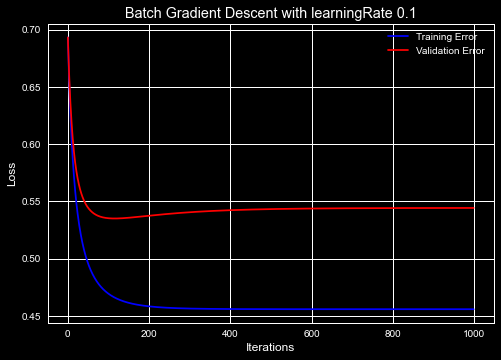

In [108]:
drawBGDPlots(0.1)

100%|██████████| 1000/1000 [00:00<00:00, 2102.10it/s]


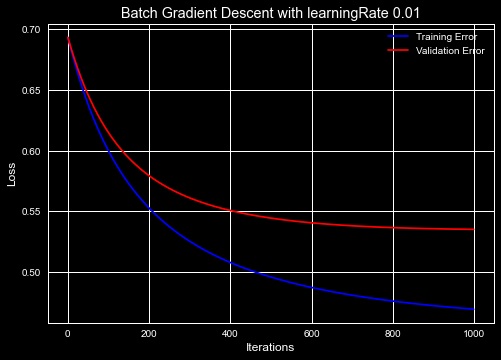

In [109]:
drawBGDPlots(0.01)

100%|██████████| 1000/1000 [00:00<00:00, 2106.73it/s]


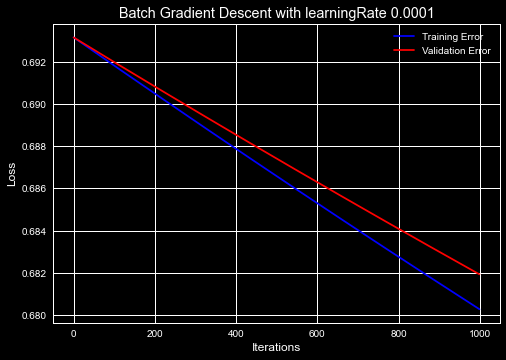

In [110]:
drawBGDPlots(0.0001)

100%|██████████| 1000/1000 [00:00<00:00, 1647.20it/s]


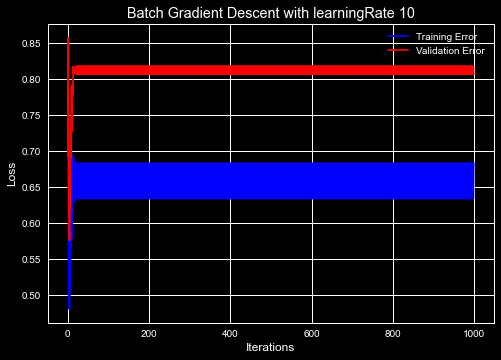

In [111]:
drawBGDPlots(10)

In [112]:
def getPredictionList(X, theta):
    '''
    Get the prediction list
    :param X: Input vector
    :param theta: Theta parameters
    :return: prediction list
    '''
    hypo = hypothesis(X, theta)
    output = np.zeros((X.shape[0],))
    output[hypo >= 0.5] = 1
    output = output.astype('int')
    return output

In [113]:
def getConfusionMatrix(X, y, theta):
    '''
    Get the confusion matrix, Accuracy, Precision, Recall and F1 score
    :param X: Input vector
    :param y: Desired output vector
    :param theta: Theta parameters
    :return: None
    '''
    # getting the prediction list
    y_ = getPredictionList(X, theta)

    # getting the confusion matrix
    confusionMatrix = np.zeros((2, 2))
    for i in tqdm(range(y.shape[0])):
        confusionMatrix[int(y[i]), int(y_[i])] += 1

    # getting the accuracy, precision, recall and f1 score
    accuracy = (confusionMatrix[0, 0] + confusionMatrix[1, 1]) / np.sum(confusionMatrix)
    precision = (confusionMatrix[1, 1]) / confusionMatrix[:, 1].sum()
    recall = (confusionMatrix[1, 1]) / confusionMatrix[1, :].sum()
    f1 = 2 * precision * recall / (precision + recall)
    print(confusionMatrix)
    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('F1: ' + str(f1))

In [114]:
# Confusion matrix of the format:
# [[(actual 0 and predicted 0), (actual 0 and predicted 1)],
#  [(actual 1 and predicted 0), (actual 1 and predicted 1)]]
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 110338.71it/s]

[[50.  4.]
 [10. 13.]]
Accuracy: 0.8181818181818182
Precision: 0.7647058823529411
Recall: 0.5652173913043478
F1: 0.65


## Logistic Regression with Stochastic Gradient Descent(SGD)

In [136]:
def stochasticGradientDescentSingle(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    '''
    Perform SGD taking 1 random sample at a time
    :param X_train: Training input vector
    :param y_train: Training output vector
    :param X_validation: Validation input vector
    :param y_validation: Validation output vector
    :param learningRate: Learning rate
    :param maxEpochs: Maximum number of epochs
    :return: theta parameters, list containing train errors and list containing validation errors
    '''
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        j = np.random.randint(0, m)
        grad = gradient(X_train[j], y_train[j], theta)
        theta = theta - learningRate * grad
    return theta, trainErrorList, validationErrorList


In [137]:
def stochasticGradientDescentAll(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    '''
    Perform SGD taking all samples and updating theta for every iteration in every epoch
    :param X_train: Training input vector
    :param y_train: Training output vector
    :param X_validation: Validation input vector
    :param y_validation: Validation output vector
    :param learningRate: Learning rate
    :param maxEpochs: Maximum number of epochs
    :return: theta parameters, list containing train errors and list containing validation errors
    '''
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        # np.random.shuffle(X_train)
        j = np.random.randint(0, m)
        grad = gradient(X_train[j], y_train[j], theta)
        theta = theta - learningRate * grad
        # for j in range(m):
            # microGrad = gradient(X_train[j, :], y_train[j], theta)
            # theta = (theta - (learningRate * microGrad))
    return theta, trainErrorList, validationErrorList


In [139]:
mainTheta, trainErrorList, validationErrorList = stochasticGradientDescentSingle(
    X_train, y_train, X_validation, y_validation, 0.001, 1000)
mainTheta

100%|██████████| 1000/1000 [00:00<00:00, 1361.76it/s]


array([-0.01512613,  0.01399455,  0.02718553,  0.00275159,  0.00164442,
        0.0061684 ,  0.01302605,  0.00891   ,  0.01562167], dtype=float128)

In [141]:
mainTheta, trainErrorList, validationErrorList = stochasticGradientDescentAll(
    X_train, y_train, X_validation, y_validation, 0.001, 100)
mainTheta

100%|██████████| 100/100 [00:00<00:00, 1931.02it/s]


array([-0.00144208,  0.00082521,  0.00222787,  0.00091843,  0.00058636,
        0.0007934 ,  0.00195888,  0.00118167,  0.00133524], dtype=float128)

In [132]:
def drawSGDSinglePlots(learningRate=0.01, maxEpochs=1000):
    theta, trainErrorList, validationErrorList = stochasticGradientDescentSingle(
        X_train, y_train, X_validation, y_validation, learningRate, maxEpochs)
    plt.plot(trainErrorList, label='Training Error', color='blue')
    plt.plot(validationErrorList, label='Validation Error', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

100%|██████████| 100/100 [00:00<00:00, 2170.10it/s]


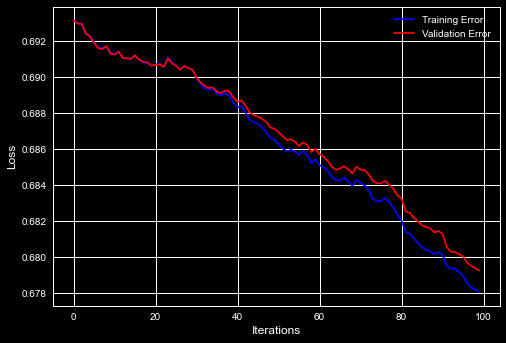

In [133]:
drawSGDPlots(0.01, 100)

100%|██████████| 500/500 [00:07<00:00, 66.50it/s]


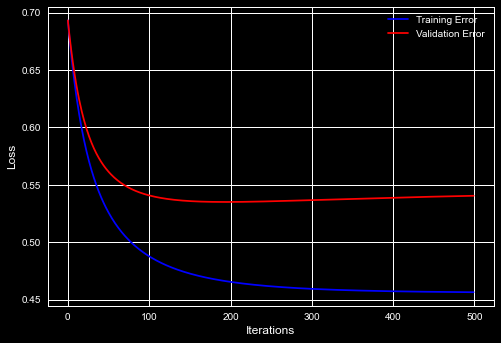

In [128]:
drawSGDPlots(0.001, 500)

 84%|████████▍ | 84/100 [00:07<00:00, 19.56it/s]/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: divide by zero encountered in log
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: invalid value encountered in multiply
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
100%|██████████| 100/100 [00:07<00:00, 12.61it/s]


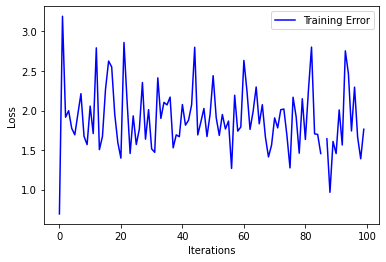

In [148]:
drawSGDPlots(1, 100)

100%|██████████| 1000/1000 [00:19<00:00, 51.43it/s]


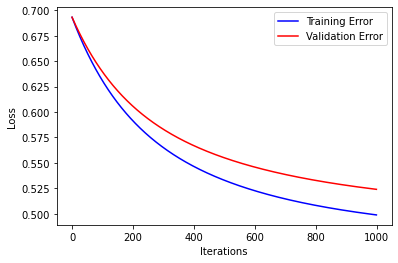

In [ ]:
drawSGDPlots(0.0001)

100%|██████████| 3000/3000 [00:52<00:00, 57.15it/s]


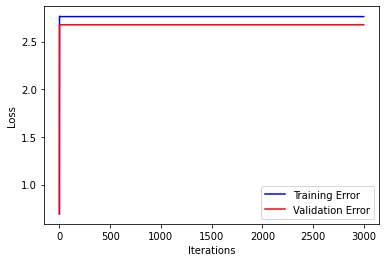

In [ ]:
drawSGDPlots(10, 3000)

In [ ]:
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 60197.84it/s]

[[33. 14.]
 [16. 14.]]
Accuracy: 0.6103896103896104
Precision: 0.673469387755102
Recall: 0.7021276595744681
F1: 0.6875000000000001


# Sklearn's Implementation of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

In [ ]:
sklearnModel = LogisticRegression()

LogisticRegression()

In [ ]:
trainSize, trainScores, testScores = learning_curve(LogisticRegression(), X_train, y_train)

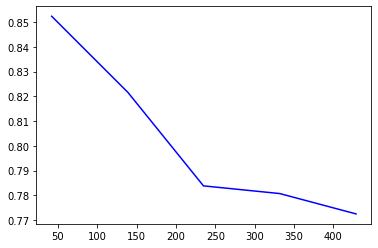

In [ ]:
plt.plot(trainSize, np.mean(trainScores, axis=1), label='Training Error', color='blue')
plt.show()

In [ ]:
model = LogisticRegression()

In [150]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

AttributeError: 'LogisticRegression' object has no attribute 'loss_curve_'